In [13]:
#Importation de la base de donnée
import pandas as pd

df = pd.read_excel("/Users/admin/Desktop/MIASHS/MasterM1SSD/ProjetNA/NA_les34dernierspays.xlsx", sheet_name=None)  # dict: nom_feuille -> DataFrame
df
df = df['Feuil1']
# Exemple d'accès à une feuille:
df.head()

,Country,Quality Score,SDGi,Life Expectancy,HDI,Per Capita GDP,Region,Income Group,Population (millions),Cropland Footprint,...,Cropland,Grazing land,Forest land,Fishing ground,Built up land.2,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required,actual \nCountry Overshoot Day \n2018
0,Somalia,3A,45.6,57.0680,NaN,-,Africa,LI,15.008200,0.039674,...,0.039674,0.383808,0.137961,0.227054,0.029470,0.817967,-0.198055,0.641986,1.242130,NaT
1,South Africa,3A,63.7,NaN,0.707,7440.411818,Africa,UM,57.792500,0.253768,...,0.253768,0.522085,0.032844,0.153767,0.033710,0.996175,-2.804287,2.401368,3.815053,1900-05-30 23:55:13.806
2,South Sudan,3A,38.9,57.6040,0.429,-,Africa,LM,10.975900,0.252910,...,0.252910,1.064002,0.361423,0.006570,0.043807,1.728712,0.116994,1.018384,0.932323,1900-12-23 09:52:01.625
3,Spain,3A,79.5,83.4317,0.905,32981.460812,EU,HI,46.692898,0.977626,...,0.977626,0.132164,0.302175,0.058581,0.064708,1.535255,-2.856236,2.774817,2.860431,1900-05-10 12:57:54.090
4,Sri Lanka,3A,68.1,76.8120,0.779,4028.206816,Asia-Pacific,LM,21.228801,0.270144,...,0.270144,0.019496,0.043867,0.068250,0.052412,0.454169,-1.059017,0.956125,3.331771,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Country                                   34 non-null     object        
 1   Quality Score                             34 non-null     object        
 2   SDGi                                      31 non-null     float64       
 3   Life Expectancy                           31 non-null     float64       
 4   HDI                                       33 non-null     float64       
 5   Per Capita GDP                            34 non-null     object        
 6   Region                                    34 non-null     object        
 7   Income Group                              34 non-null     object        
 8   Population (millions)                     34 non-null     float64       
 9   Cropland Footprint                

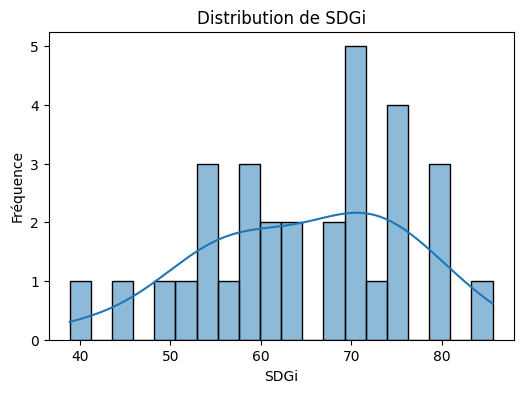

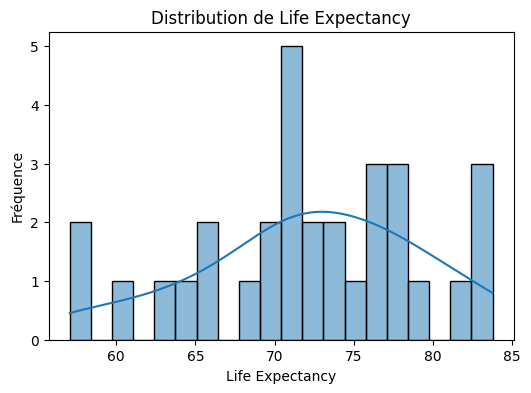

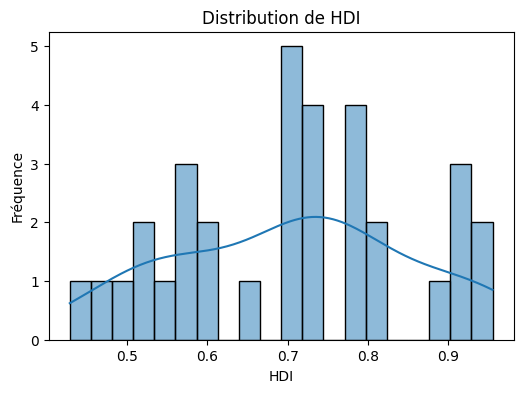

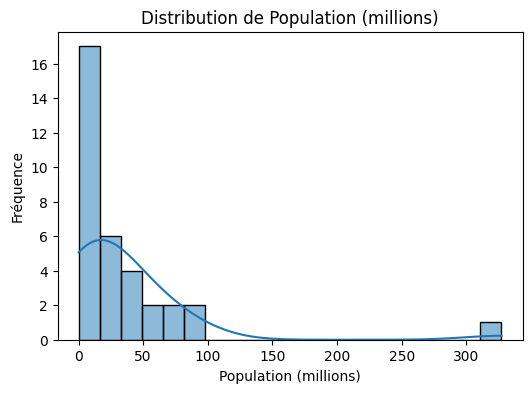

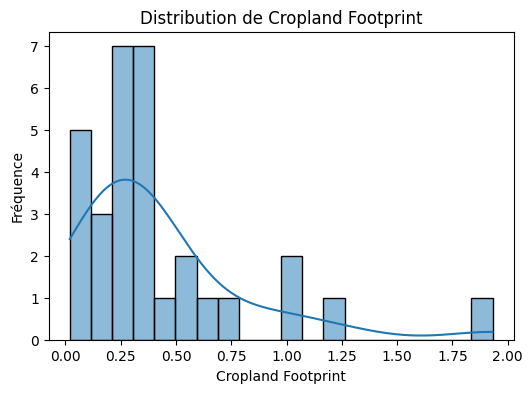

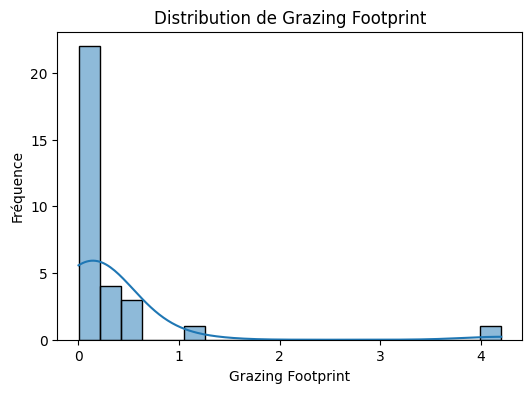

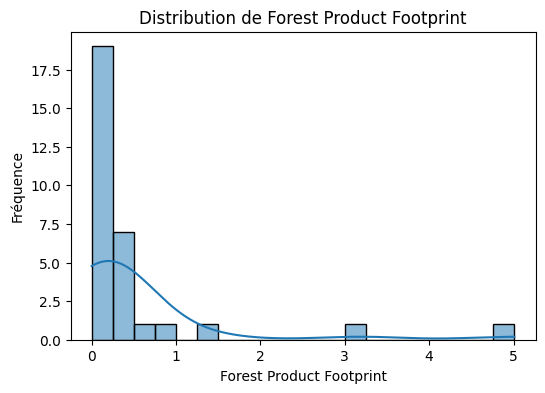

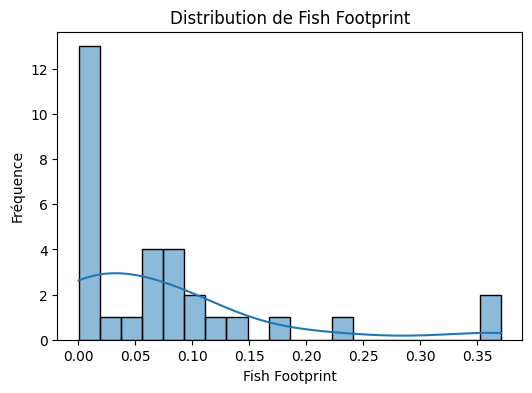

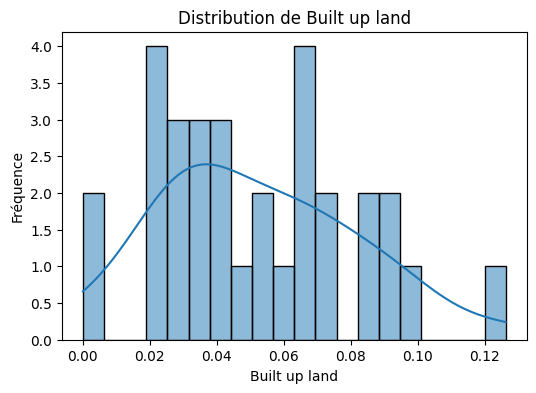

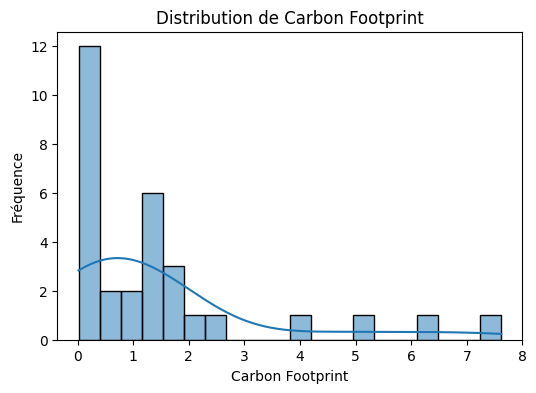

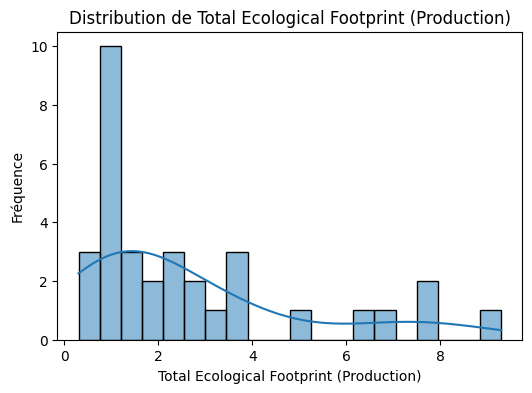

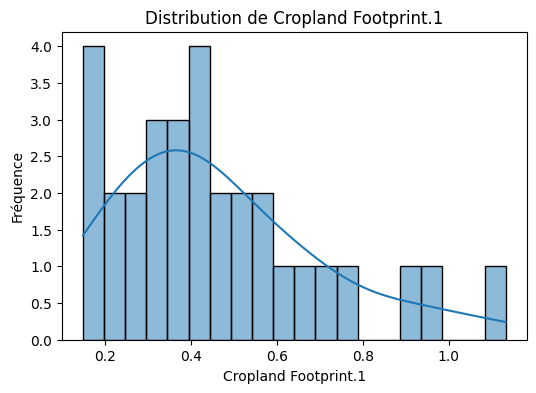

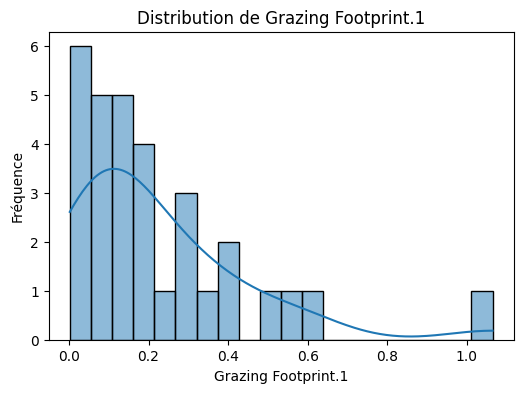

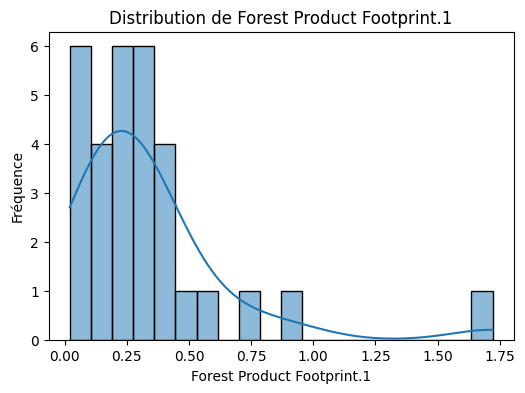

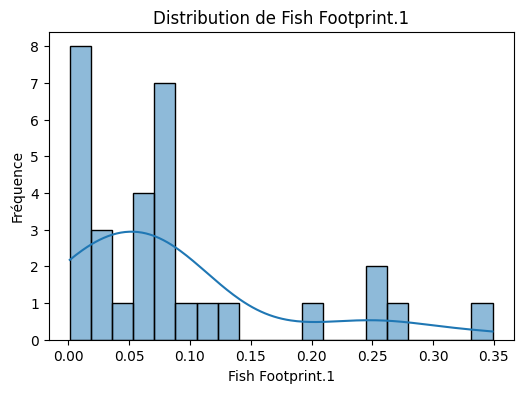

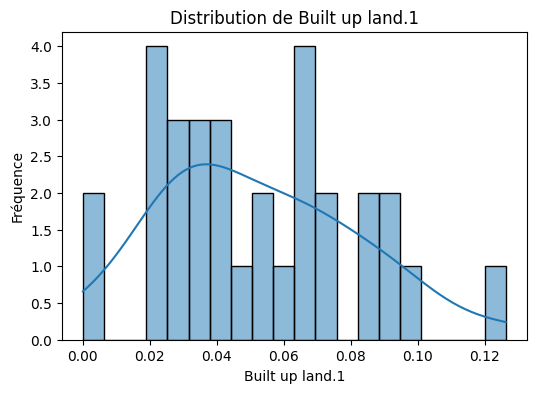

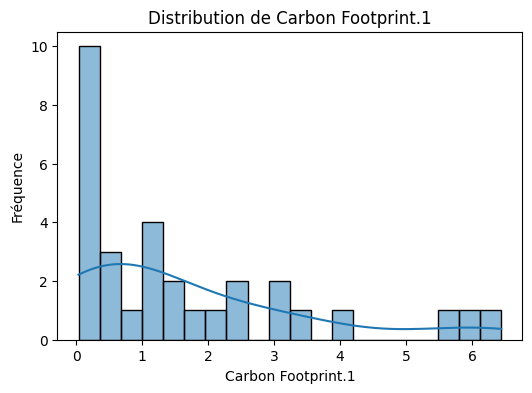

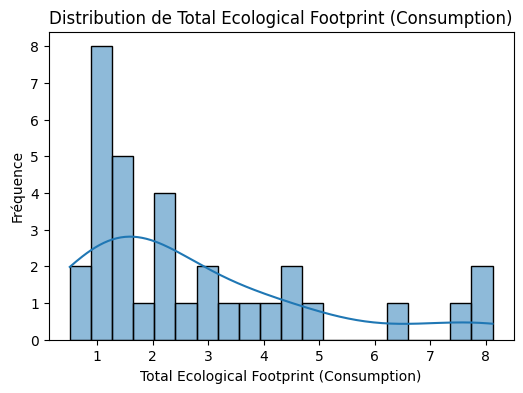

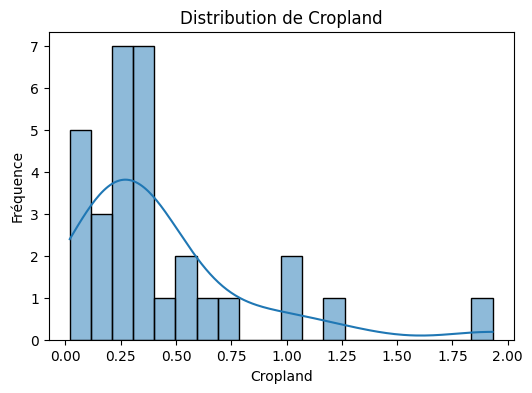

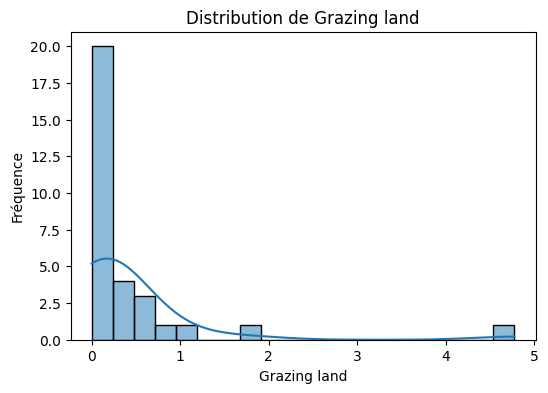

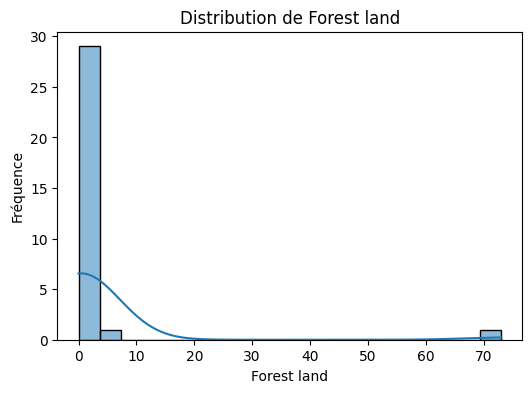

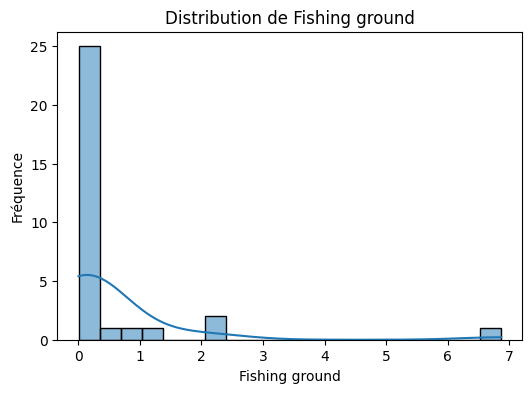

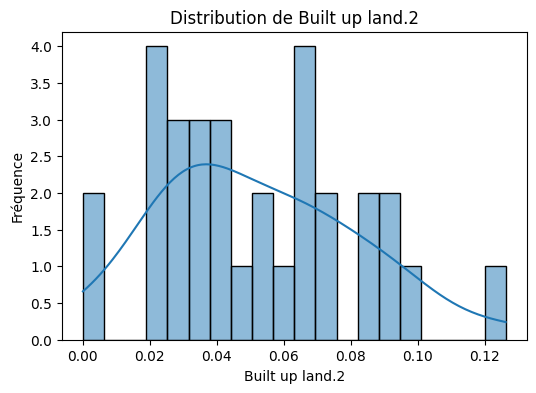

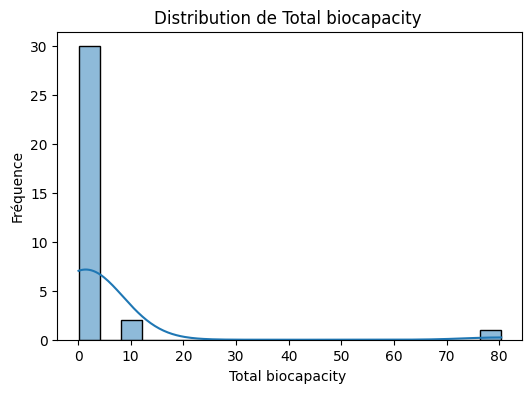

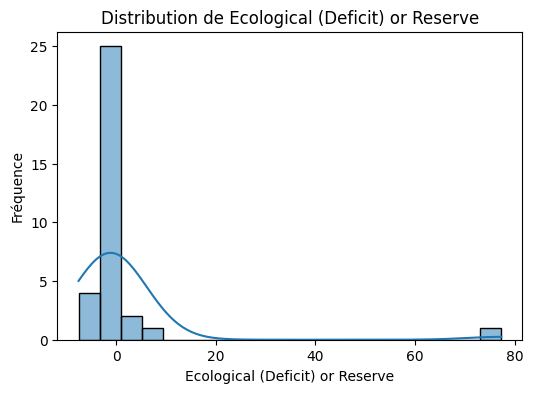

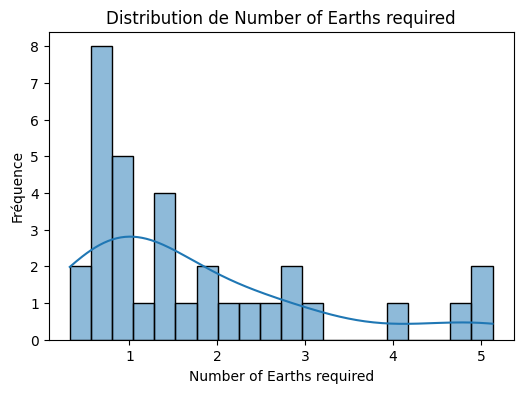

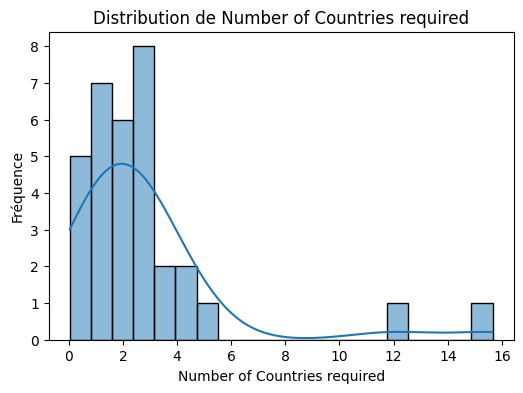

                                              SDGi  Life Expectancy       HDI  \
SDGi                                      1.000000         0.930340  0.912700   
Life Expectancy                           0.930340         1.000000  0.926081   
HDI                                       0.912700         0.926081  1.000000   
Population (millions)                     0.253692         0.227419  0.279927   
Cropland Footprint                        0.438805         0.273641  0.313689   
Grazing Footprint                        -0.025749        -0.011752  0.009180   
Forest Product Footprint                  0.382377         0.314041  0.344412   
Fish Footprint                            0.371434         0.411424  0.392550   
Built up land                             0.508058         0.325380  0.333377   
Carbon Footprint                          0.324662         0.376327  0.547555   
Total Ecological Footprint (Production)   0.501375         0.468422  0.624502   
Cropland Footprint.1        

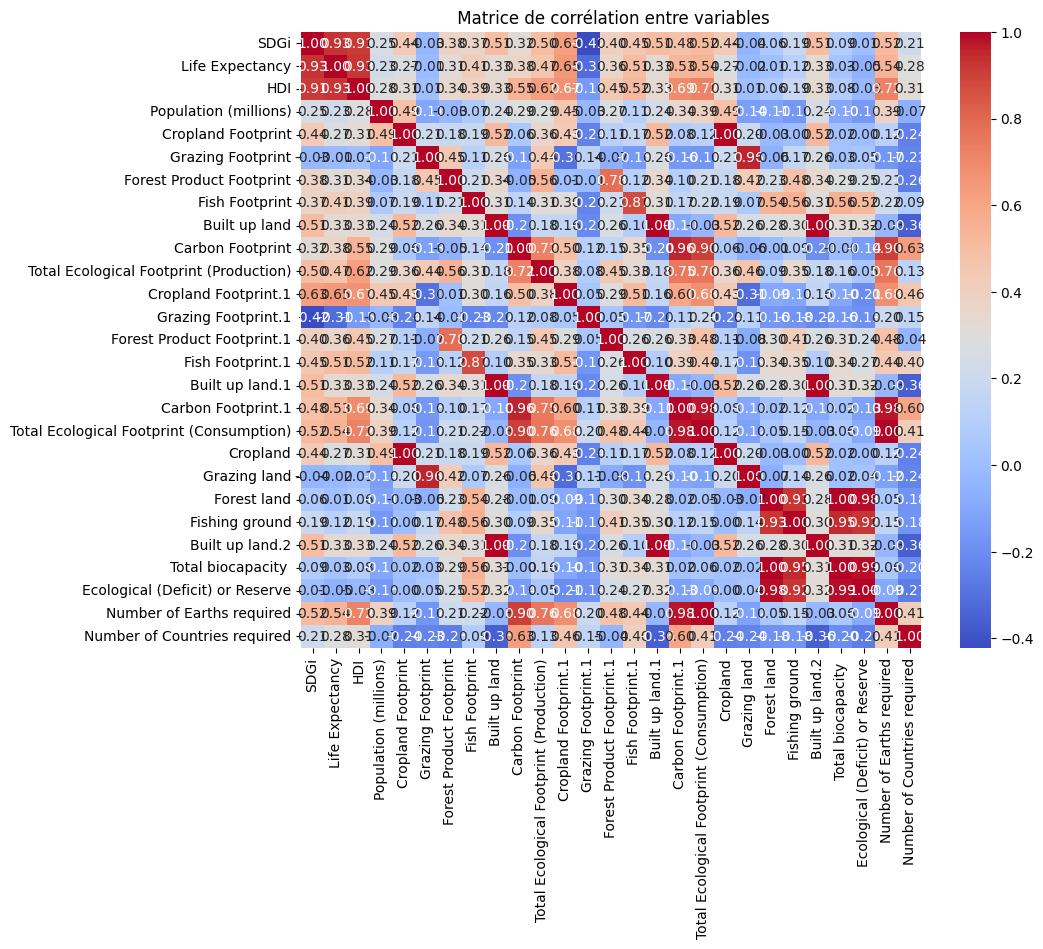

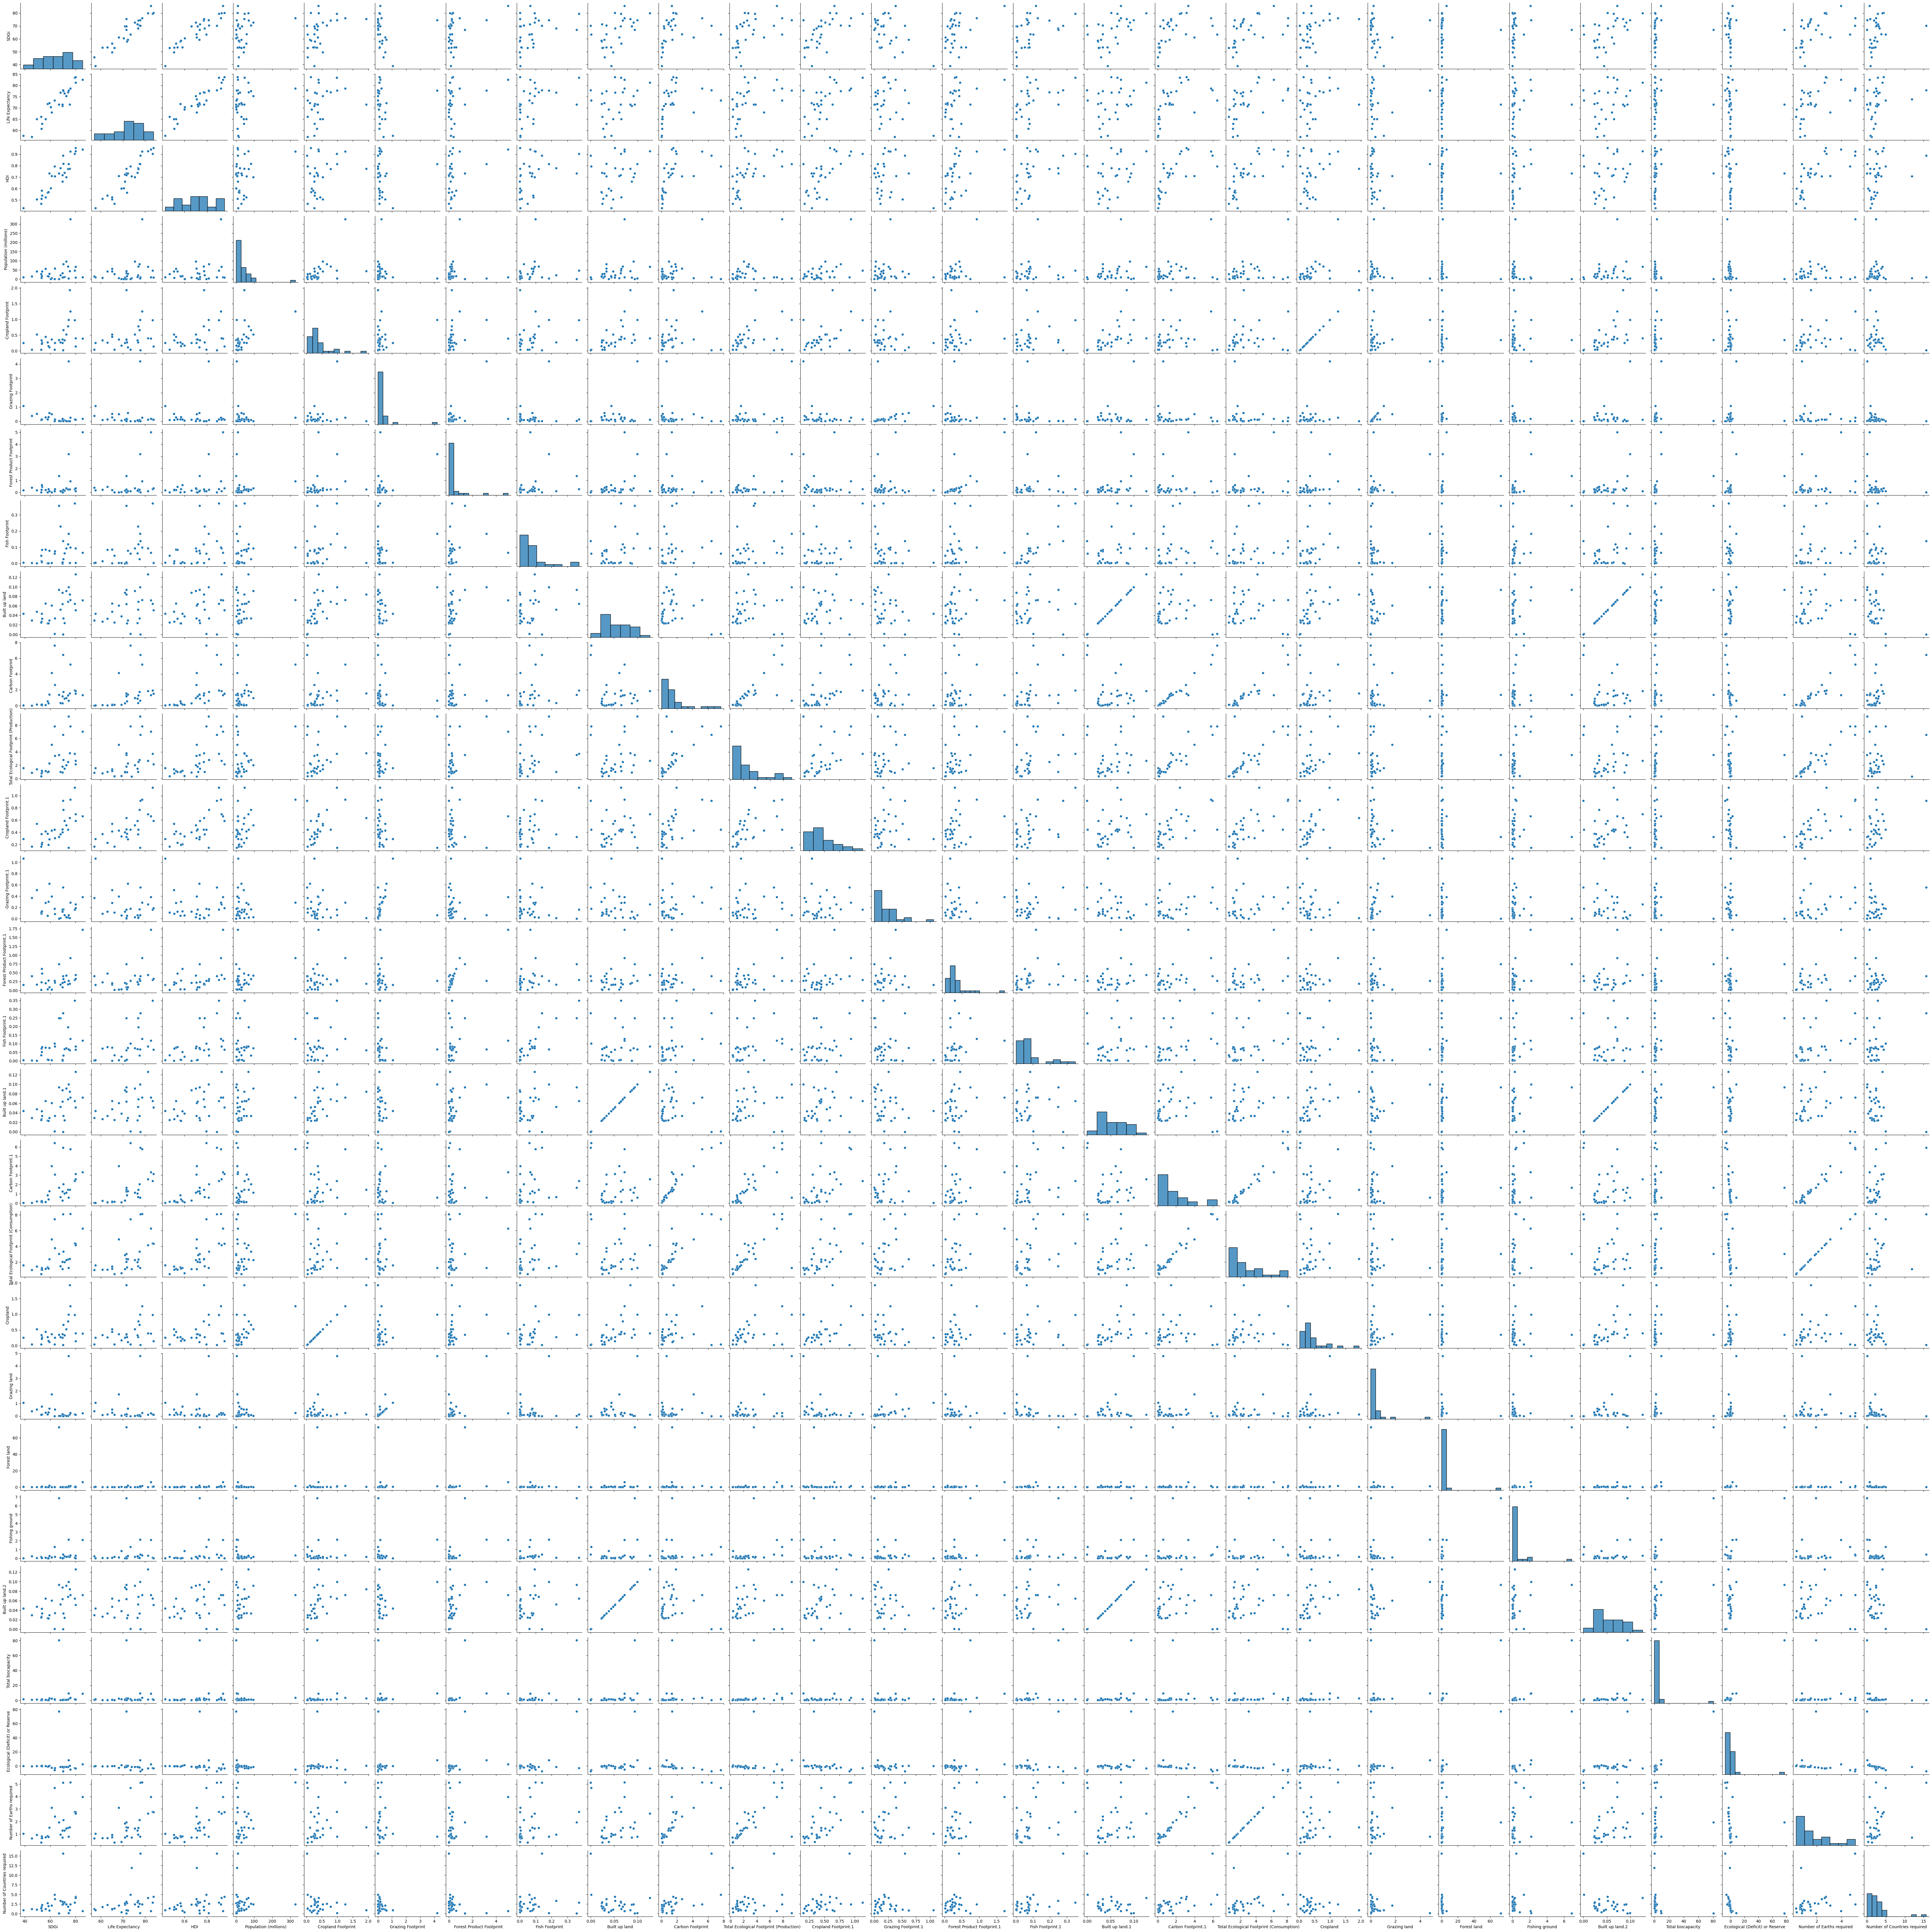

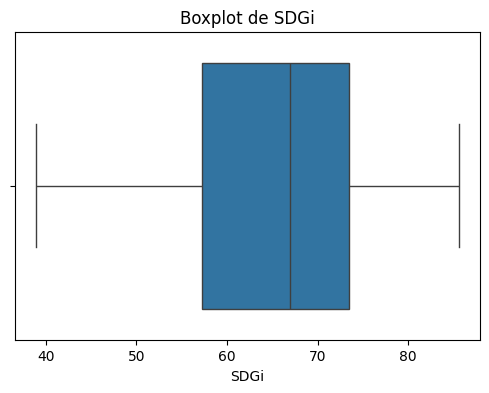

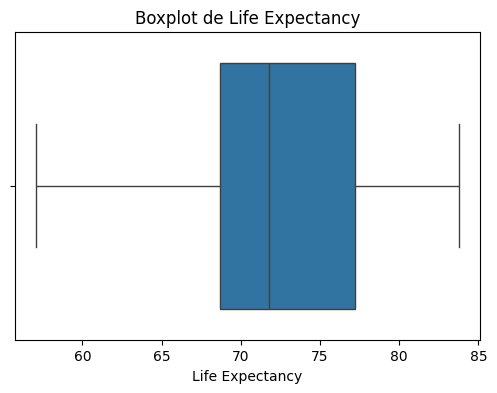

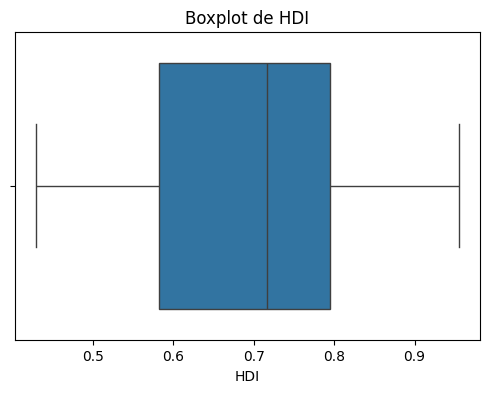

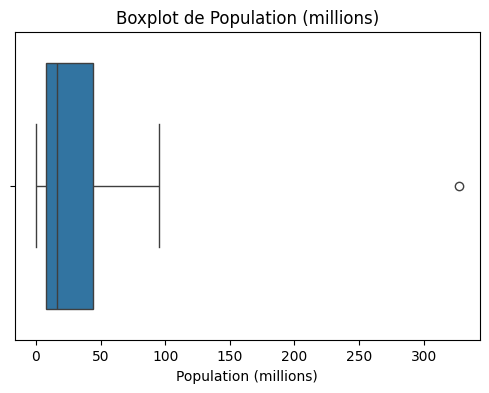

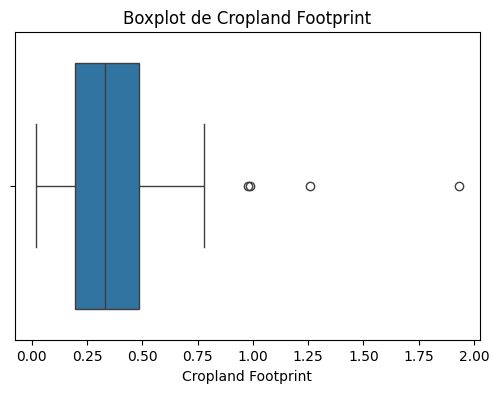

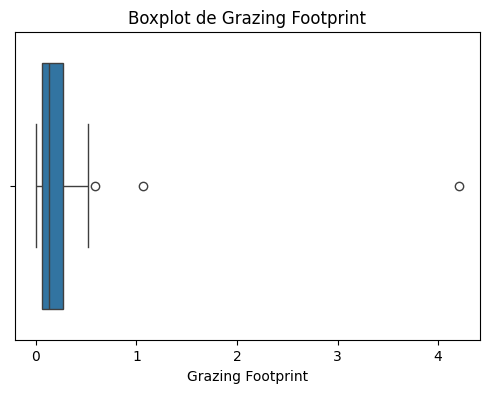

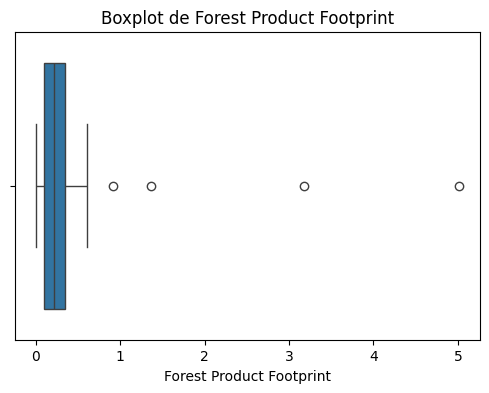

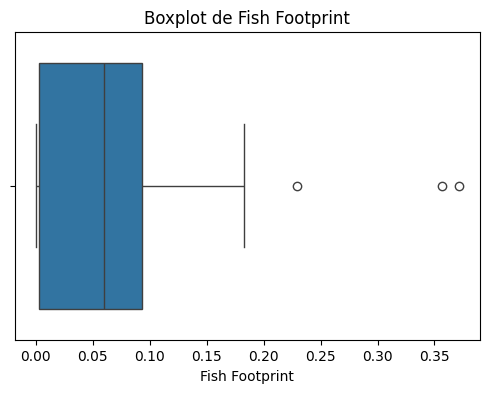

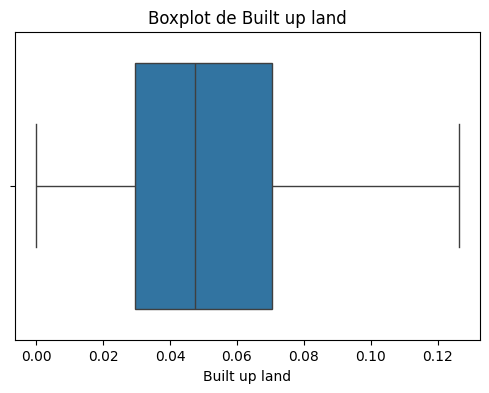

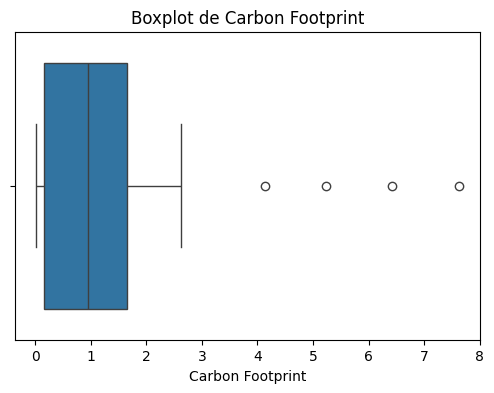

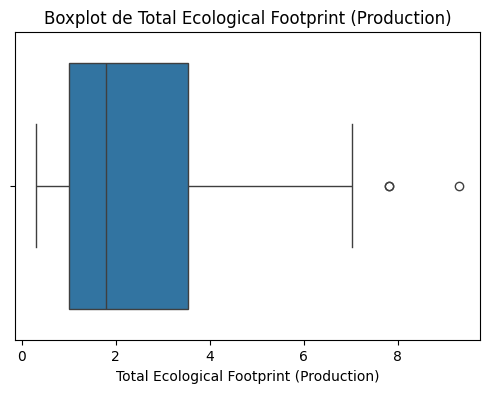

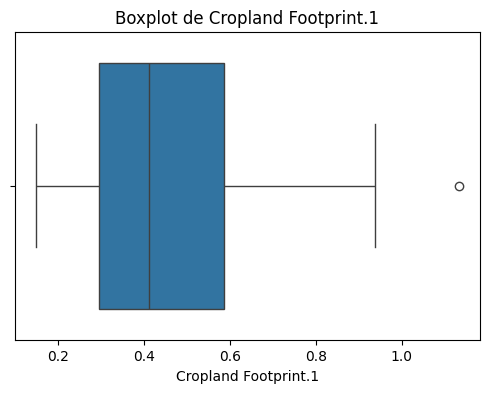

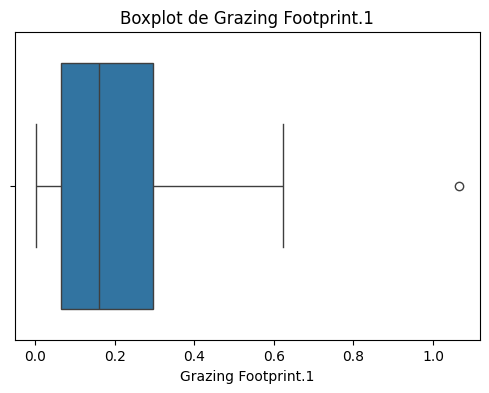

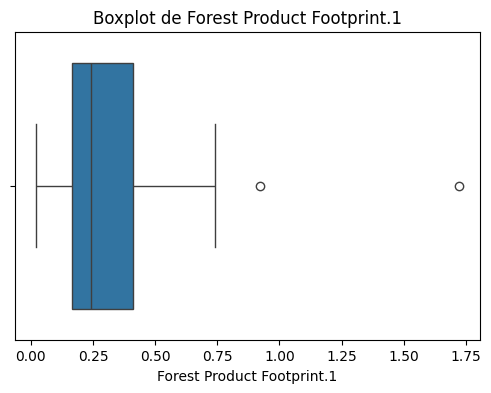

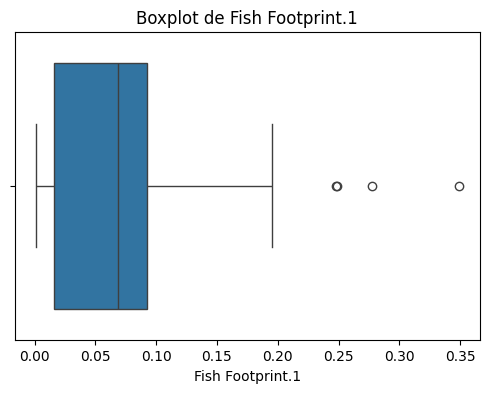

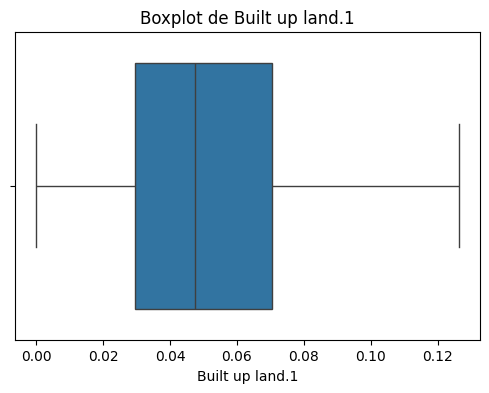

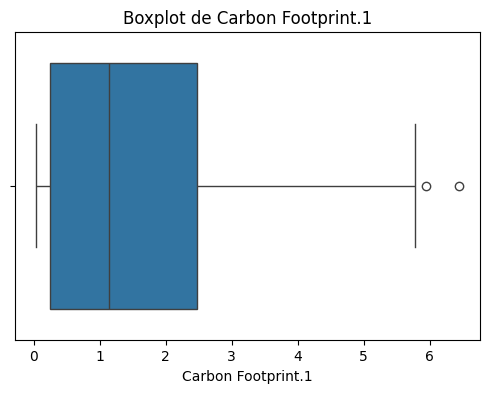

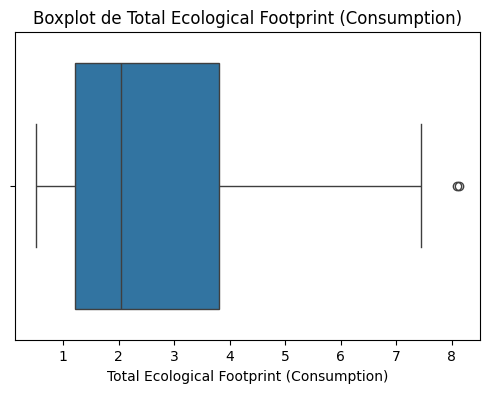

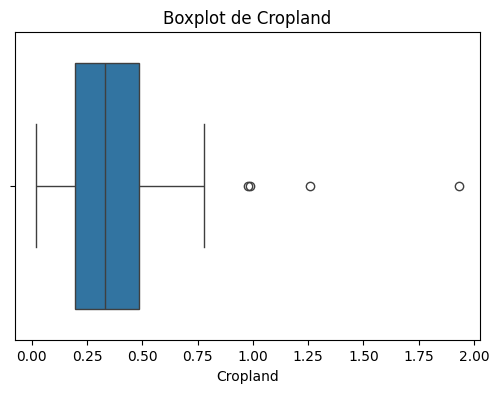

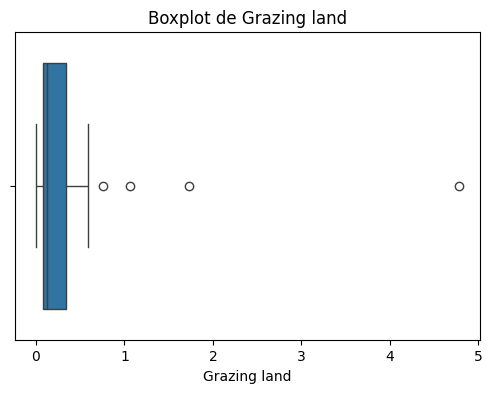

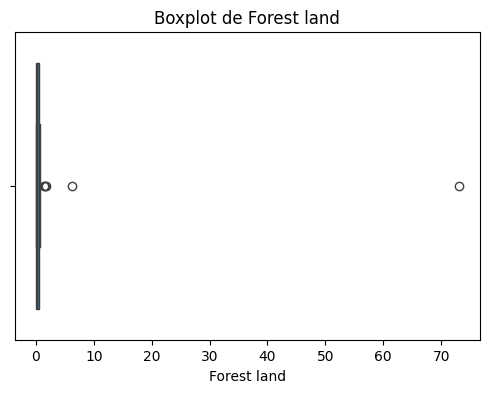

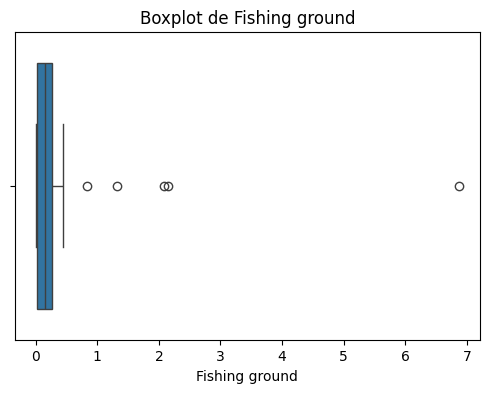

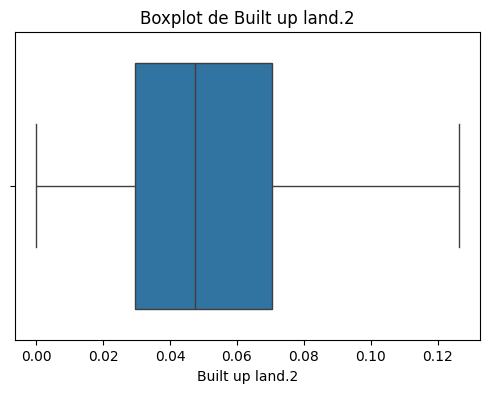

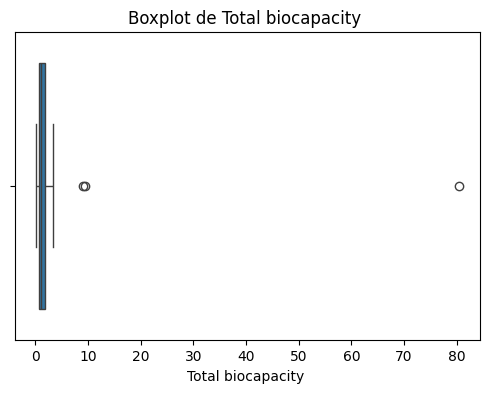

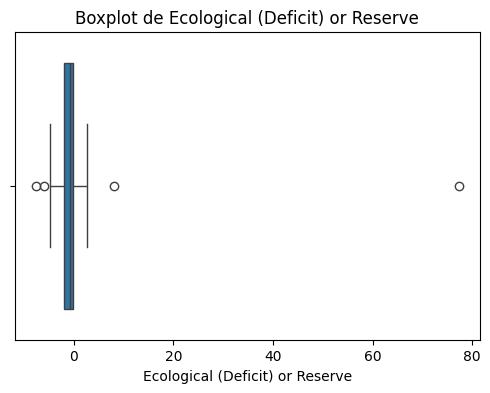

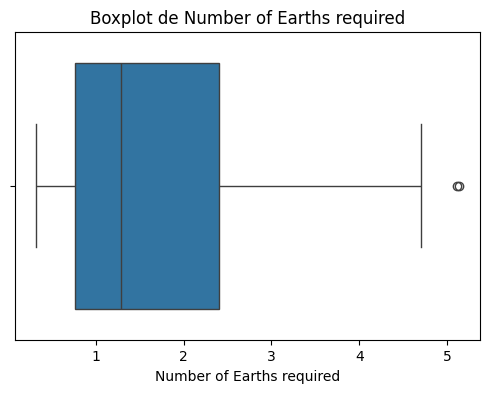

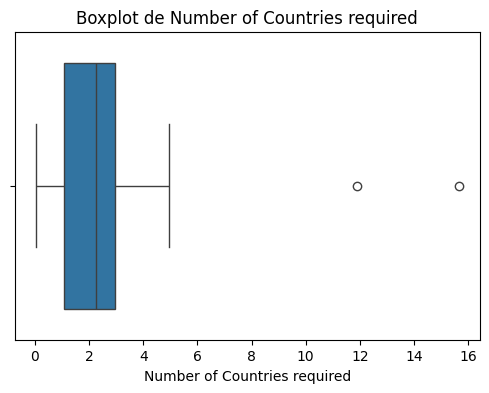

In [14]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print(df.describe())

# -----------------------
# Analyse univariée
# -----------------------
# Histogrammes pour toutes les colonnes numériques
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

# -----------------------
# Analyse multivariée
# -----------------------
# Matrice de corrélation
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Matrice de corrélation entre variables')
plt.show()

# Scatterplot matrix (facultatif mais utile)
sns.pairplot(df[numeric_cols])
plt.show()

# Boxplots pour détecter des outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


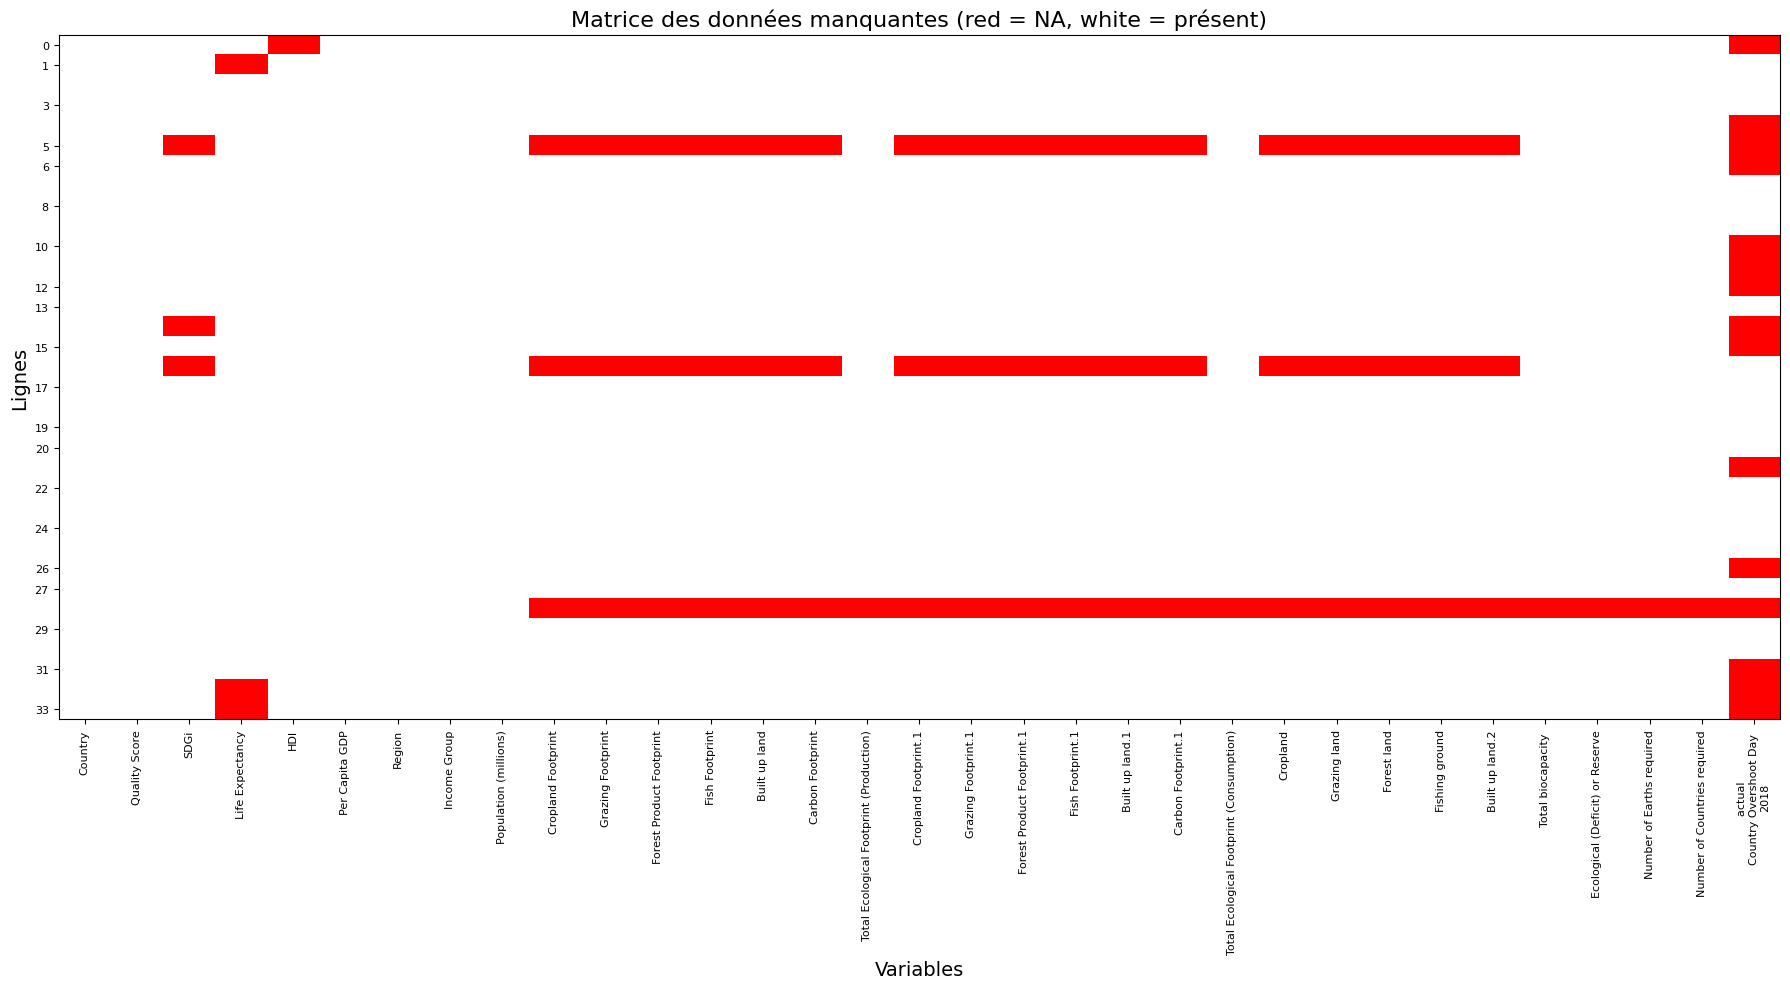

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Charger les données
data = pd.read_excel("NA_les34dernierspays.xlsx")  # adapte le chemin si besoin

# Matrice booléenne des valeurs manquantes
missing = data.isna()

# Conversion en 0 = présent, 1 = manquant
values = np.where(missing, 1, 0)

# Définir les couleurs : 0 = jaune (présent), 1 = blanc (NA)
cmap = ListedColormap(["white", "red"])

# Création de la figure
plt.figure(figsize=(18, 10))
plt.imshow(values, aspect='auto', cmap=cmap)

plt.title("Matrice des données manquantes (red = NA, white = présent)", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Lignes", fontsize=14)

# Ajouter les labels des colonnes
plt.xticks(
    ticks=np.arange(len(data.columns)),
    labels=data.columns,
    rotation=90,
    fontsize=8
)

# Alléger les labels de lignes
plt.yticks(
    ticks=np.linspace(0, len(data)-1, 20, dtype=int),
    fontsize=8
)

plt.tight_layout()
plt.show()


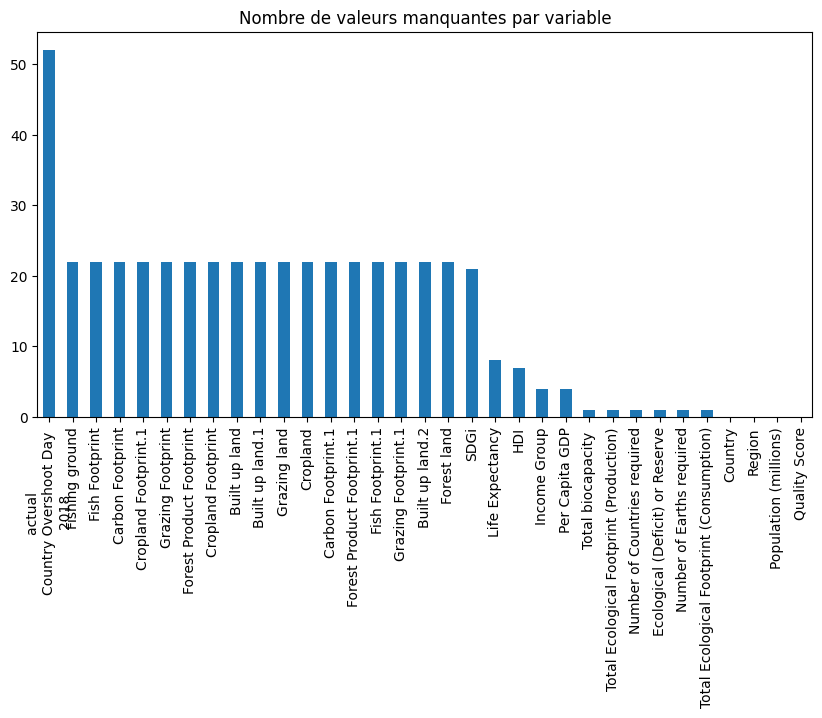

In [10]:
data.isna().sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Nombre de valeurs manquantes par variable")
plt.show()


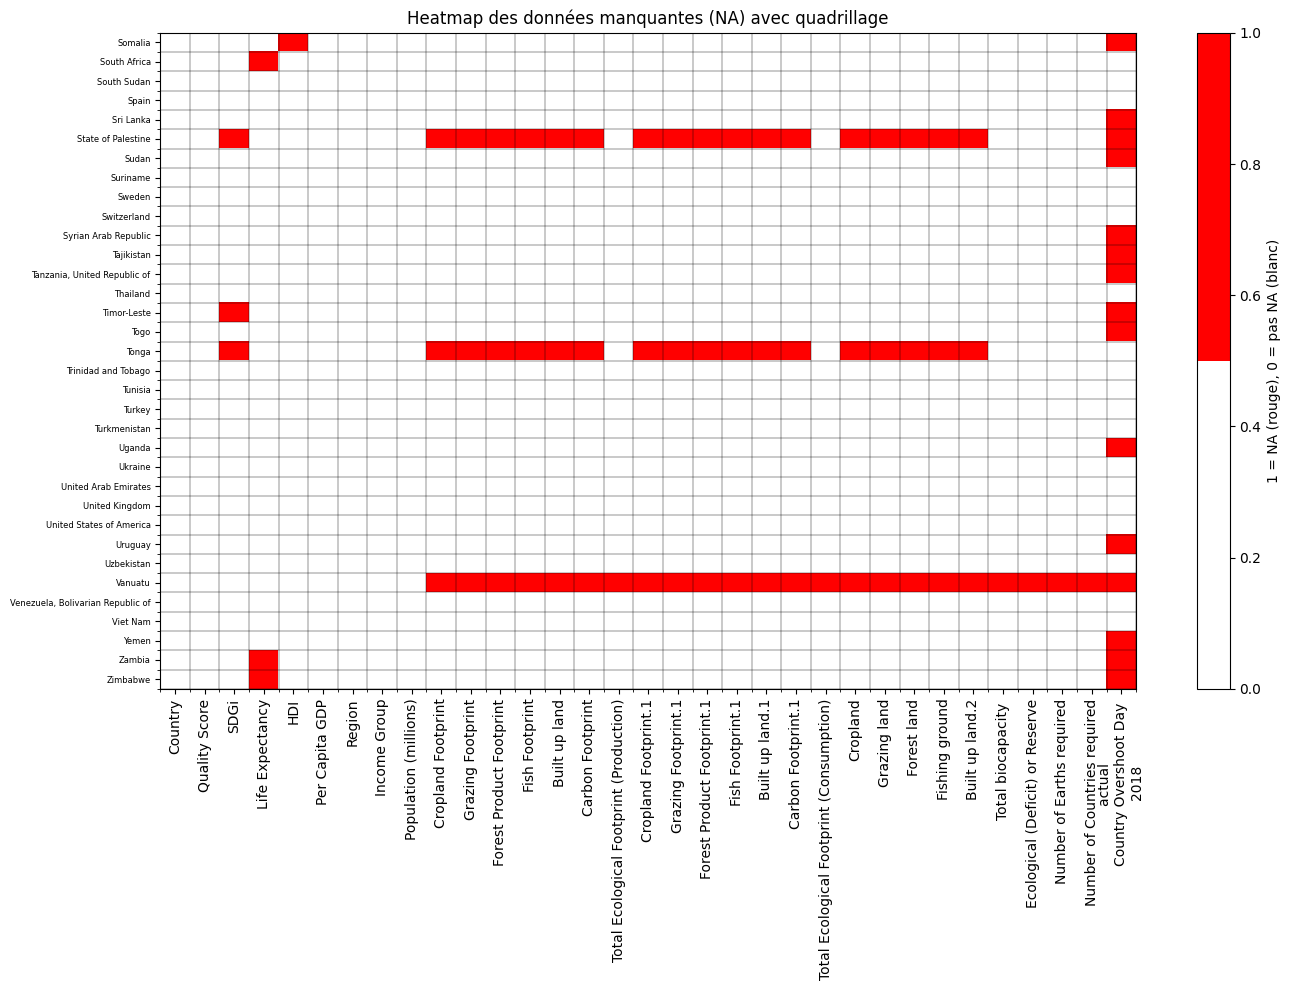

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Matrice binaire : 1 = NA, 0 = pas NA
na_matrix = df.isna().astype(int).values

# Palette binaire : blanc = 0, rouge = 1
cmap = mcolors.ListedColormap(["white", "red"])

plt.figure(figsize=(14, 10))

# Heatmap
plt.imshow(na_matrix, cmap=cmap, aspect="auto")

# --- Axe X : noms des colonnes ---
plt.xticks(
    ticks=np.arange(len(df.columns)),
    labels=df.columns,
    rotation=90
)

# --- Axe Y : noms des pays ---
plt.yticks(
    ticks=np.arange(len(df)),
    labels=df["Country"],
    fontsize=6
)

# --- Quadrillage ---
plt.grid(color='black', linestyle='-', linewidth=0.3)

# Ajuster le quadrillage pour qu’il s’aligne sur les cellules
plt.gca().set_xticks(np.arange(-0.5, len(df.columns), 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, len(df), 1), minor=True)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.3)
plt.grid(False)  # enlève la grille principale, garde la fine

plt.colorbar(label="1 = NA (rouge), 0 = pas NA (blanc)")
plt.title("Heatmap des données manquantes (NA) avec quadrillage")

plt.tight_layout()
plt.show()